# CSE519: HW2_Sanket_Goutam

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u> 

## **Setup**

- Dataset downloaded directly and saved locally

In [1]:
import pandas as pd
import numpy as np
import random

# Display format for float values
pd.set_option('float_format', '{:f}'.format)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.ticker import PercentFormatter

## **Section 1: Library and Data Imports (Q1)**

- Import your libraries and read the data into a dataframe. Print the head of the dataframe. 

In [2]:
use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity", "HasDetections"
           ]
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16'        
        }

Create a sample size from the data set, chosen randomly, for initial analysis.
This is done so as to reduce the load on the system for processing the data.

In [3]:
# Sampling random records from the dataset

n = 8921483 #number of records in file
s = int(n/8) #desired sample size

skip = sorted(random.sample(range(1,n+1),n-s)) 

# Uncomment below line to load entire dataset
skip = 0

In [4]:
# Read csv file into a dataframe with the selected columns
filename = 'train.csv'
# load for select questions
data = pd.read_csv(filename, usecols = lambda x:x in use_cols, dtype = dtypes, skiprows=skip)

Let's learn more about this dataframe. Let's look at what then dataframe looks like and how many rows have been loaded. But before, we need to set the index for the dataframe.

In [5]:
# Set 'MachineIdentifier' as the Index for the dataframe
data.set_index('MachineIdentifier', inplace=True)

In [8]:
data.shape

(1000000, 38)

In [9]:
data.describe()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,IsProtected,IeVerIdentifier,Census_OEMNameIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,...,Census_OSBuildNumber,Census_OSBuildRevision,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,996293.000000,995965.000000,995965.000000,1000000.000000,1000000.000000,995987.000000,993302.000000,989177.000000,995353.000000,995350.000000,...,1000000.000000,1000000.000000,979465.000000,1000000.000000,1000000.000000,1000000.000000,991954.000000,965828.000000,965828.000000,1000000.000000
mean,NaN,47777.648438,NaN,108.058341,27.854385,NaN,NaN,NaN,NaN,NaN,...,15831.305397,980.024081,NaN,0.486126,0.126244,0.038246,0.057587,NaN,NaN,0.499665
std,0.000000,14035.049805,0.000000,63.017084,65.606418,0.000000,NaN,NaN,0.000000,NaN,...,1966.159608,2951.676927,NaN,0.499808,0.332124,0.191790,0.233154,0.000000,0.000000,0.500000
min,0.000000,16.000000,0.000000,1.000000,-127.000000,0.000000,1.000000,15.000000,1.000000,3.000000,...,7601.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,7.000000,49480.000000,1.000000,51.000000,-29.000000,1.000000,111.000000,1443.000000,2.000000,1998.000000,...,15063.000000,165.000000,142.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,7.000000,53447.000000,1.000000,97.000000,58.000000,1.000000,117.000000,2102.000000,4.000000,2500.000000,...,16299.000000,285.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
75%,7.000000,53447.000000,2.000000,162.000000,75.000000,1.000000,137.000000,2668.000000,4.000000,2874.000000,...,17134.000000,547.000000,556.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000
max,35.000000,70507.000000,6.000000,222.000000,126.000000,1.000000,429.000000,6144.000000,112.000000,4480.000000,...,18242.000000,24214.000000,1084.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000


In [10]:
data.head(10)

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuildLab,IsProtected,...,Census_GenuineStateName,Census_ActivationChannel,Census_FirmwareManufacturerIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
000007535c3f730efa9ea0b7ef1bd645,1.1.14600.4,4.13.17134.1,1.263.48.0,7.000000,53447.000000,1.000000,93,64,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,OFFLINE,Retail,628.000000,0,0,0,0.000000,0.000000,8.000000,0
00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.273.1527.0,7.000000,53447.000000,1.000000,88,115,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,IS_GENUINE,OEM:NONSLP,355.000000,0,0,0,0.000000,0.000000,3.000000,1
000024872c81cf03fa862aa8f99e0984,1.1.15200.1,4.18.1807.18075,1.275.895.0,7.000000,53447.000000,1.000000,171,-74,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,IS_GENUINE,OEM:NONSLP,142.000000,0,0,0,0.000000,0.000000,3.000000,0
00003e5e679ccfe7a13e953c47dd584f,1.1.15200.1,4.18.1807.18075,1.275.26.0,7.000000,53447.000000,1.000000,199,75,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,IS_GENUINE,Volume:GVLK,93.000000,0,0,0,0.000000,0.000000,11.000000,1
000048a73fb4b6a94cc169389208032d,1.1.15200.1,4.18.1807.18075,1.275.482.0,7.000000,53447.000000,1.000000,68,74,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,IS_GENUINE,Retail,168.000000,0,1,0,0.000000,0.000000,12.000000,1
0000714f389b8a3638597ee69b655e38,1.1.14600.4,4.9.10586.494,1.263.469.0,7.000000,53447.000000,1.000000,89,118,10586.545.amd64fre.th2_release.160802-1857,1.000000,...,IS_GENUINE,Retail,554.000000,1,1,0,0.000000,0.000000,1.000000,1
00007a70254b648e445a6e1937ab3efb,1.1.15200.1,4.18.1807.18075,1.275.795.0,7.000000,53447.000000,1.000000,100,75,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,IS_GENUINE,Volume:GVLK,554.000000,0,0,0,0.000000,0.000000,11.000000,1
0000870bccbcf600c7252517b1d39234,1.1.14306.0,4.13.17134.1,1.257.902.0,7.000000,7945.000000,2.000000,155,-23,17134.1.amd64fre.rs4_release.180410-1804,1.000000,...,INVALID_LICENSE,Retail,168.000000,0,0,0,0.000000,0.000000,10.000000,0
00008f5ffaf2a82e2ba75dd31d011c2c,1.1.15200.1,4.9.10586.0,1.275.30.0,7.000000,53447.000000,1.000000,190,17,10586.420.amd64fre.th2_release_sec.160527-1834,1.000000,...,IS_GENUINE,Volume:GVLK,355.000000,0,0,0,0.000000,1.000000,11.000000,1


## **Section 2: Measure of Power (Q2a & 2b)**

***Q2a.* Define a measure of computer power as a function of RAM, processor core count and any other relevant features you find. What is the distribution of power among the machines in the dataset?**



Let's assume a simple function f(x,y) which defines the compute power of a system using 
> a: TotalPhysicalRAM 

> b: ProcessorCoreCount. 

> c: Wdft_IsGamer // Gaming systems are typically more powerful than an average system

> d: Census_PrimaryDiskTotalCapacity   // Powerful systems typically tend to have higher Disk Capacity but not vice-versa


For simplicity, we assume that compute power f() is defined as 
> **f() = 0.3a + 0.4b + 0.2*c + 0.1*d**



Weights are arbitrarily decided based on an understanding that CPUCoreCount and RAM contribute towards ComputePower more than other factors.


Note: 
We need to clean these columns first as some of them have NaN values, so we will just drop those rows with NaN values.
For columns, *a*,*b*, and *d* we will need to normalize their values to a range of 0 to 1. This is because their individual values are not on the same scale, and thus we cannot directly use them.

In [209]:
# Read csv file into a dataframe with the selected columns
filename = 'train.csv'

# Sampling random records from the dataset
n = 8921483 #number of records in file
s = int(n/8) #desired sample size

skip = sorted(random.sample(range(1,n+1),n-s)) 
# Uncomment the following line to load the entire dataset
skip = 0

data = pd.read_csv(filename, usecols = lambda x:x in use_cols, dtype = dtypes, skiprows=skip)

# Set 'MachineIdentifier' as the Index for the dataframe
data.set_index('MachineIdentifier', inplace=True)



In [210]:
#Load the respective columns to the dataframe 

_cols = ['Census_TotalPhysicalRAM', 'Census_ProcessorCoreCount', 'Wdft_IsGamer', 
         'Census_PrimaryDiskTotalCapacity','HasDetections']

df = data[_cols]
df.shape

(8921483, 5)

In [211]:
df.head(10)

,Census_TotalPhysicalRAM,Census_ProcessorCoreCount,Wdft_IsGamer,Census_PrimaryDiskTotalCapacity,HasDetections
MachineIdentifier,,,,,
0000028988387b115f69f31a3bf04f09,4096.000000,4.000000,0.000000,476940.000000,0
000007535c3f730efa9ea0b7ef1bd645,4096.000000,4.000000,0.000000,476940.000000,0
000007905a28d863f6d0d597892cd692,4096.000000,4.000000,0.000000,114473.000000,0
00000b11598a75ea8ba1beea8459149f,4096.000000,4.000000,0.000000,238475.000000,1
000014a5f00daa18e76b81417eeb99fc,6144.000000,4.000000,0.000000,476940.000000,1
000016191b897145d069102325cab760,8192.000000,2.000000,0.000000,114473.000000,1
0000161e8abf8d8b89c5ab8787fd712b,4096.000000,2.000000,0.000000,476940.000000,1
000019515bc8f95851aff6de873405e8,4096.000000,2.000000,0.000000,305245.000000,0
00001a027a0ab970c408182df8484fce,4096.000000,4.000000,0.000000,305245.000000,0


***Preprocessing of data***
1. Drop rows with NaN values.
2. Normalize the columns so that everything is on the same scale of 0 to 1.

In [212]:
df = df.dropna(how='any')
df.shape

(8538014, 5)

In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Census_TotalPhysicalRAM', 'Census_ProcessorCoreCount', 
         'Census_PrimaryDiskTotalCapacity']] = scaler.fit_transform(df[['Census_TotalPhysicalRAM', 'Census_ProcessorCoreCount', 
         'Census_PrimaryDiskTotalCapacity']])

In [214]:
df.head(10)

,Census_TotalPhysicalRAM,Census_ProcessorCoreCount,Wdft_IsGamer,Census_PrimaryDiskTotalCapacity,HasDetections
MachineIdentifier,,,,,
0000028988387b115f69f31a3bf04f09,0.002442,0.015707,0.000000,0.000000,0
000007535c3f730efa9ea0b7ef1bd645,0.002442,0.015707,0.000000,0.000000,0
000007905a28d863f6d0d597892cd692,0.002442,0.015707,0.000000,0.000000,0
00000b11598a75ea8ba1beea8459149f,0.002442,0.015707,0.000000,0.000000,1
000014a5f00daa18e76b81417eeb99fc,0.003745,0.015707,0.000000,0.000000,1
000016191b897145d069102325cab760,0.005047,0.005236,0.000000,0.000000,1
0000161e8abf8d8b89c5ab8787fd712b,0.002442,0.005236,0.000000,0.000000,1
000019515bc8f95851aff6de873405e8,0.002442,0.005236,0.000000,0.000000,0
00001a027a0ab970c408182df8484fce,0.002442,0.015707,0.000000,0.000000,0


In [215]:
df['ComputePower'] = 0.3 * df.Census_ProcessorCoreCount + 0.4 * df.Census_ProcessorCoreCount + \
                        0.2 * df.Wdft_IsGamer + 0.1 * df.Census_PrimaryDiskTotalCapacity

In [216]:
df['ComputePower'].describe()

count   8538014.000000
mean          0.067898
std           0.091635
min           0.000000
25%           0.010995
50%           0.010995
75%           0.203616
max           0.700000
Name: ComputePower, dtype: float64

<AxesSubplot:>

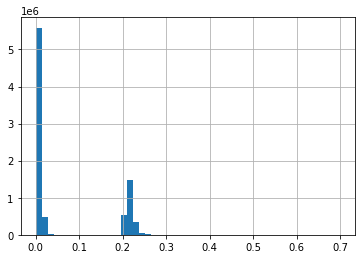

In [217]:
df['ComputePower'].hist(bins=50)

This distribution graph doesn't really provide a lot of useful information. This is happening because of the various outliers that are present in the dataset. There are some machines whose RAM and CPU values are much higher than the rest of the systems.

We can verify this from the statistics provided by describe(). Mean of Compute Power is at 0.07 and standard deviation is at 0.09. This implies that a majority of the points are spread around 0.1. However, if we look at the max values we see that there are outlier points at 0.7. The number of data points at that high value may be just 1 or 2 but their presence affects the distribution graph heavily.

So, for the purposes of the next question, we will remove these outliers. Now typically, removing any data point does affect the data set however in situations like this, presence of these outliers are not allowing us to understand the distribution properly.


***Q2b* Are powerful computers more or less likely to have malware than underpowered machines? Plot power vs malware detection to support your conclusion. (5 points)**


<AxesSubplot:xlabel='ComputePower'>

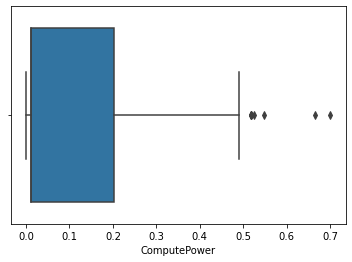

In [218]:
# Identifying and removing the outliers from the dataset

sns.boxplot(x=df['ComputePower'])

Here we notice the outliers are present between 0.5 and 0.7. We notice most of the data points are present with ComputePower<0.5.

For better understanding of the distribution of data, we will only consider the points that are present in 
> 0.0 < ComputePower < 0.5

In [219]:
df = df.loc[df['ComputePower']<0.5]
df.shape

(8538006, 6)

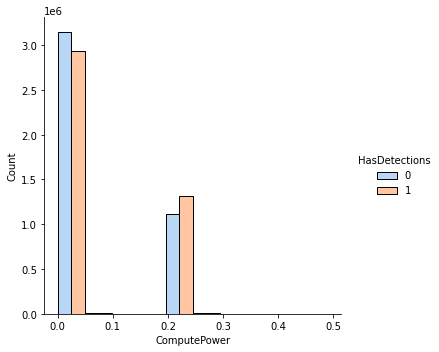

In [220]:
sns.displot(data=df, x='ComputePower', hue='HasDetections', stat='count', multiple='dodge',
           palette='pastel', bins=10)

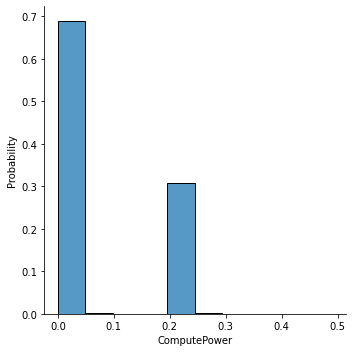

In [221]:
sns.displot(data=df.loc[df['HasDetections']==1], x='ComputePower', bins=10, stat='probability', palette='pastel')

Figure above shows the distribution of ComputePower against the HasDetections.

From the figures above, there seems to be a higher ratio of low powered systems being more prone to being affected by the malware than the high powered systems. Although one thing to notice here is also the number of low-powered devices in the dataset. The dataset seems to contain a larger number of low powered systems than high-powered systems, which makes sense considering a lot of old systems are still in circulation.

So the conclusion that *low-powered systems are more vulnerable* while seems to hold true for the current dataset, it may not be very conclusive in real-world.

In [222]:
# data['HasDetections'].corr(data['ComputePower'])

pearsonr(df['HasDetections'], df['ComputePower'])

(0.05764713964842027, 0.0)

The correlation between ComputePower and HasDetections is 0.06 and the pearson coefficient of the correlation (p-value) is 0. This implies that these two features have no significant relation between them.

## **Section 3: OS version vs Malware detected (Q3)**

***Q3.* Software is updated to fix vulnerabilities when found. But these updates can also open a can of worms. Produce plots showing the number (and %) of malware detections against Census_OSBuildNumber and also against Census_OSBuildRevision.  Discuss what you find.**

In [323]:
# Read csv file into a dataframe with the selected columns
filename = 'train.csv'

# Sampling random records from the dataset
n = 8921483 #number of records in file
s = int(n/8) #desired sample size

skip = sorted(random.sample(range(1,n+1),n-s)) 

# Uncomment below line to load entire dataset
skip = 0

data = pd.read_csv(filename, usecols = lambda x:x in use_cols, dtype = dtypes, skiprows=skip)

# Set 'MachineIdentifier' as the Index for the dataframe
data.set_index('MachineIdentifier', inplace=True)

In [324]:
#Load the respective columns to the dataframe 

_cols = ['Census_OSBuildNumber', 'Census_OSBuildRevision', 'HasDetections']

df = data[_cols]
df.shape

(8921483, 3)

In [325]:
df = df.dropna(how='any')
df.shape

(8921483, 3)

In [326]:
df.head(10)

,Census_OSBuildNumber,Census_OSBuildRevision,HasDetections
MachineIdentifier,,,
0000028988387b115f69f31a3bf04f09,17134,165,0
000007535c3f730efa9ea0b7ef1bd645,17134,1,0
000007905a28d863f6d0d597892cd692,17134,165,0
00000b11598a75ea8ba1beea8459149f,17134,228,1
000014a5f00daa18e76b81417eeb99fc,17134,191,1
000016191b897145d069102325cab760,17134,165,1
0000161e8abf8d8b89c5ab8787fd712b,17134,165,1
000019515bc8f95851aff6de873405e8,14393,0,0
00001a027a0ab970c408182df8484fce,17134,254,0


Let's look at how the distribution looks between different OS builds and also between OS Revisions.

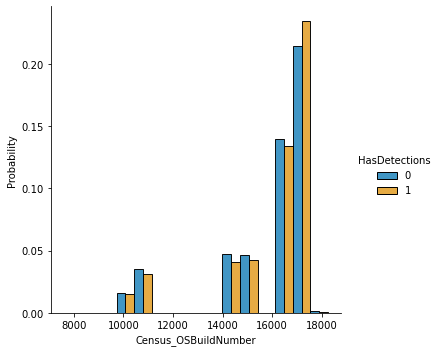

In [327]:
sns.displot(data=data, x='Census_OSBuildNumber', hue='HasDetections',
            stat='probability', multiple='dodge', bins=15, palette='colorblind')

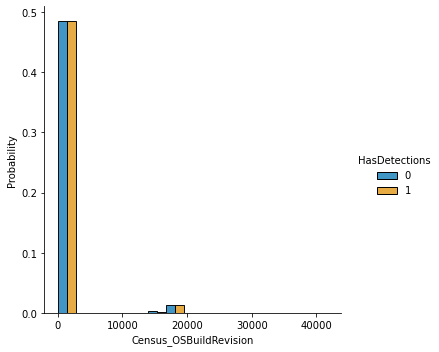

In [328]:
sns.displot(data=data, x='Census_OSBuildRevision', hue='HasDetections', 
            stat='probability', multiple='dodge', bins=15, palette='colorblind')

These graphs do not provide a lot of information other than the fact that recent OS builds seem to be more impacted by the malware and early build revisions are also more impacted by the malware. But there seems to be more information missing here.

Quite specfically, which OS versions have the most malware detected and which build revision inside each build version has the most malware detected.


So, let's zoom in on the part where we see maximum malware density.

In [329]:
print(df.Census_OSBuildNumber.nunique(), df.Census_OSBuildRevision.nunique())

165 285


Let's narrow down on the revisions inside each OS release.

Let's group build revisions per OS Build.
Typically each OS Build will have multiple revisions, we are interested in finding out which of these revisions inside a build is more prone to being affected.

In [330]:
_cols = ['Census_OSBuildNumber', 'Census_OSBuildRevision', 'HasDetections']

df = data[_cols]
df = df.groupby(["Census_OSBuildNumber", 'Census_OSBuildRevision']).agg(['count' , "sum"])
df = df[df["HasDetections"]["count"]> 1000]
df = df.sort_index()
df = df.reset_index()
df["int_percent"] = df["HasDetections"]["sum"] / df["HasDetections"]["count"] * 100
df.head(10)

Census_OSBuildNumber Census_OSBuildRevision HasDetections        int_percent
                                                      count    sum            
0                10240                  16384         25834  12114   46.891693
1                10240                  16405          6626   3070   46.332629
2                10240                  16445          1003    443   44.167498
3                10240                  16487          3770   1822   48.328912
4                10240                  16520          1105    492   44.524887
5                10240                  17071          1417    569   40.155258
6                10240                  17146          1050    467   44.476190
7                10240                  17236          1590    705   44.339623
8                10240                  17319          1007    477   47.368421
9                10240                  17394          1378    687   49.854862

OS build version: 10240 	Total Revisions: 14 	Malware per revision: 49.7701849959368
OS build version: 10586 	Total Revisions: 30 	Malware per revision: 46.961336342943426
OS build version: 14393 	Total Revisions: 39 	Malware per revision: 43.66286300035224
OS build version: 15063 	Total Revisions: 34 	Malware per revision: 47.86627162376666
OS build version: 16299 	Total Revisions: 24 	Malware per revision: 47.38563590008153
OS build version: 17134 	Total Revisions: 13 	Malware per revision: 49.47516108087591
OS build version: 17692 	Total Revisions: 1 	Malware per revision: 47.44822485207101
OS build version: 17738 	Total Revisions: 1 	Malware per revision: 37.295885042455915
OS build version: 17746 	Total Revisions: 1 	Malware per revision: 46.22950819672131
OS build version: 17751 	Total Revisions: 1 	Malware per revision: 42.04771371769384
OS build version: 17754 	Total Revisions: 1 	Malware per revision: 45.564892623716155
OS build version: 17758 	Total Revisions: 1 	Malware per 

Text(0, 0.5, 'Malware Detected (in %)')

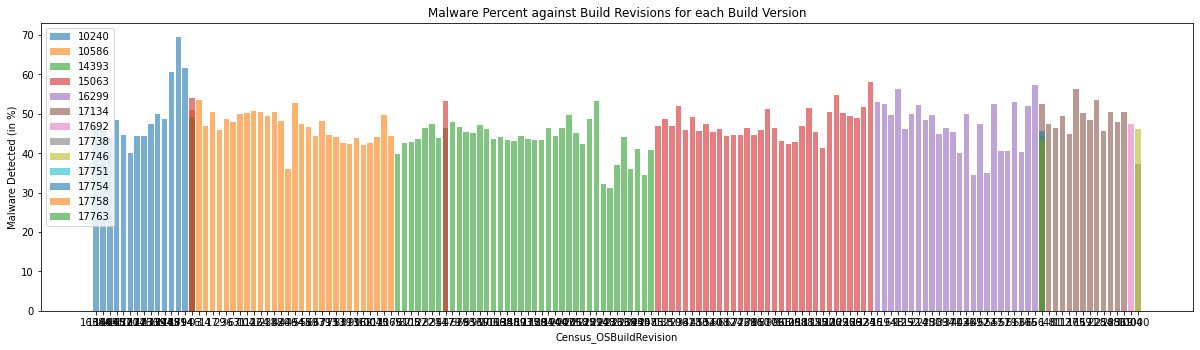

In [331]:

x = list(str(x) for x in df["Census_OSBuildRevision"])
y1 = list(df["HasDetections"]["count"])
y2 = list(df["int_percent"])


plt.rcParams['figure.figsize'] = (16.0, 4.0)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

for OS in df["Census_OSBuildNumber"].unique():
  temp = df[df["Census_OSBuildNumber"] == OS]
  temp = temp.sort_values(by=['Census_OSBuildRevision'])
  x = list(str(x) for x in temp["Census_OSBuildRevision"])
  y2 = list(temp["int_percent"])
  ax.bar(x, y2, alpha=0.6, linewidth=2, label=str(OS))
  print("OS build version:",OS,"\tTotal Revisions:", len(y2), "\tMalware per revision:", sum(y2)/ len(y2))

plt.legend()
ax.set_title('Malware Percent against Build Revisions for each Build Version')
ax.set_xlabel('Census_OSBuildRevision')
ax.set_ylabel('Malware Detected (in %)')

From this analysis, we can conclusively say that OS build version 10240 has the highest number of malwares detected even between revisions. The graph also suggests that subsequent build revisions didnot see a decline in malware detection in build version 10240, where unlike other build versions the malware detection percent actually increases with subsequent revisions.

## **Section 4: Effect of Number of AV Products Installed (Q4)**

***Q4.* Investigate the question of whether antivirus software(s) reduces the amount of malware.  Does the number of antivirus products you use matter? What is your conclusion and what is your evidence supporting it?**

In [24]:
# Read csv file into a dataframe with the selected columns
filename = 'train.csv'

# Sampling random records from the dataset
n = 8921483 #number of records in file
s = int(n/8) #desired sample size

skip = sorted(random.sample(range(1,n+1),n-s)) 

# Uncomment below line to load entire dataset
skip = 0

data = pd.read_csv(filename, usecols = lambda x:x in use_cols, dtype = dtypes, skiprows=skip)

# Set 'MachineIdentifier' as the Index for the dataframe
data.set_index('MachineIdentifier', inplace=True)

In [25]:
#Load the respective columns to the dataframe 

_cols = ['AVProductStatesIdentifier','AVProductsInstalled', 'HasDetections']

df = data[_cols]
df.shape

(8921483, 3)

In [26]:
df = df.dropna(how='any')
df.shape

(8885262, 3)

In [28]:
df.AVProductStatesIdentifier.nunique()

28970

In [29]:
df.AVProductsInstalled.nunique()

8

In [30]:
df.groupby('AVProductsInstalled')['HasDetections'].value_counts()

AVProductsInstalled  HasDetections
0.000000             0                      1
1.000000             1                3406078
                     0                2802815
2.000000             0                1483012
                     1                 975996
3.000000             0                 147421
                     1                  60682
4.000000             0                   6386
                     1                   2371
5.000000             0                    346
                     1                    125
6.000000             0                     22
                     1                      6
7.000000             1                      1
Name: HasDetections, dtype: int64

Text(0.5, 1.0, 'Malware detection probabilty vs AVProductsInstalled')

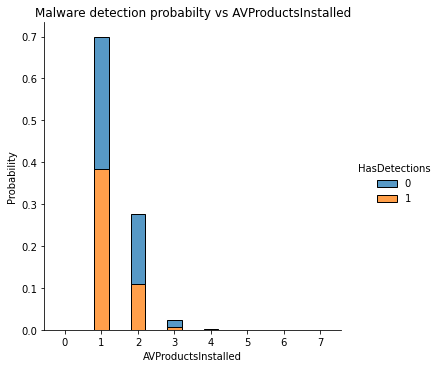

In [31]:
sns.displot(data=df, x='AVProductsInstalled', hue='HasDetections', 
            stat='probability', multiple='stack',
            discrete=True, shrink=0.4)
plt.title('Malware detection probabilty vs AVProductsInstalled')

The plot above shows the number of systems that were installed with 1-4 different AntiVirus products and whether they were found to have the malware. From this graph, we can clearly notice that among the systems which had 2 or more AntiVirus softwares installed, the malware presence was much smaller. For systems with 2 AV softwares present, we notice that more number of systems were detected to not have the malware than ones detected to have malware.

However, with systems that had only 1 AV product installed we notice more devices were found to have the malware than did not have the malware.

So from just looking at the distribution, it does seem like having more than 1 antivirus product installed on your system reduces the chances of getting impacted by Malware.

## **Section 5: Interesting findings (Q5)**

***Q5.* Create 3 plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration.**

In [33]:
# Read csv file into a dataframe with the selected columns
filename = 'train.csv'

# Sampling random records from the dataset
n = 8921483 #number of records in file
s = int(n/8) #desired sample size

skip = sorted(random.sample(range(1,n+1),n-s)) 

# Uncomment below line to load entire dataset
skip = 0


data = pd.read_csv(filename, usecols = lambda x:x in use_cols, dtype = dtypes, skiprows=skip)

# Set 'MachineIdentifier' as the Index for the dataframe
data.set_index('MachineIdentifier', inplace=True)

In [52]:
#Load the respective columns to the dataframe 

_cols = ['AVProductsEnabled', 'AVProductsInstalled', 'Wdft_IsGamer',
            'Census_DeviceFamily', 'Platform', 
            'CountryIdentifier', 'HasTpm', 'Firewall', 'Census_MDC2FormFactor',
            'HasDetections']

#use_cols.append(_cols)

data = pd.read_csv(filename, usecols = lambda x:x in _cols, dtype = dtypes, skiprows=skip)

df = data[_cols]
df.shape

(8921483, 10)

### **AntiVirus Products Enabled vs Installed**

Continuing from the previous analysis about Malware detection against AntiVirus products installed, an interesting question arises of how many of those AntiVirus products are actually enabled on the system at a time.

AVProductsEnabled value tells us how many AVProducts are active and running on the system. Let's look the plot below.

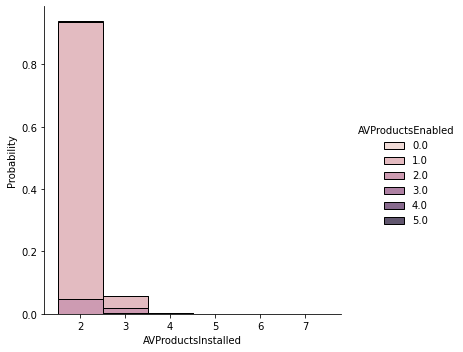

In [49]:
sns.displot(data=df.loc[(df['AVProductsInstalled']>1) & (df['HasDetections']==1)], x='AVProductsInstalled', hue='AVProductsEnabled', stat='probability', 
            multiple='stack', discrete=True)

A very interesting observation here is that for most of the systems present in the dataset which have 2 or more AV Products installed, there is only 1 product which is enabled at a time.

From the graph above, we can see that there's a very small percentage (<10%) of sytems with 2 or more antivirus products enabled that were impacted with the malware.


This goes back to further bolster our previous point that having more than 1 anti virus product installed on your system does help in keeping it safe but they need to be enabled and running.

### **Gamer, Firewall, TPM, and other features**

There are some attributes about a computer system which may provide it additional security to various kinds of malwares.

Some of these attributes are TPM (Trusted Platform Module), Firewall system, and whether the system is a Gaming system. Let's see how each of these features impact the system's chances at being affected by malware.


<AxesSubplot:>

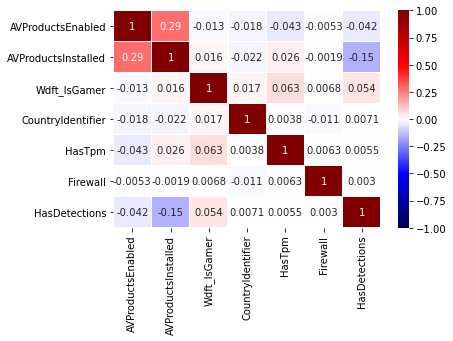

In [53]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='seismic', linewidth=0.2, annot=True)

Looking at the correlation matrix between variables, features such as Firewall/Wdft_IsGamer/HasTpm do not seem to have any correlation with the system being more/less vulnerable. This is an interesting observation as during the initial analysis (Q2), I had considered Wdft_IsGamer as an impactful feature for ComputePower which we then tried to correlate with Malware detection probability.

### **Device Type, OS, and malware**

In [74]:
_cols = ['MachineIdentifier','HasDetections', 'SmartScreen', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_OSBranch', 'OsPlatformSubRelease', 'OsBuild',
            'Census_PrimaryDiskTypeName', 'Platform', 'Processor', 'Census_OSArchitecture', 'Census_MDC2FormFactor']

data = pd.read_csv(filename, usecols = lambda x:x in _cols, dtype = dtypes, skiprows=skip)

df = data[_cols]

<AxesSubplot:xlabel='Platform'>

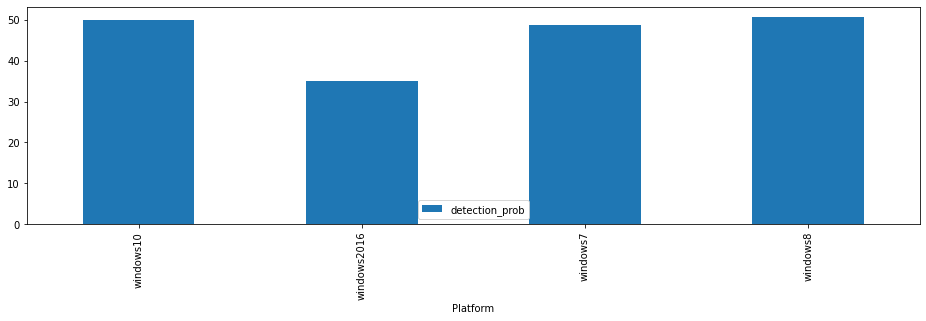

In [79]:
d1 = df.groupby('Platform')['HasDetections'].agg(['sum','count'])
d1['detection_prob'] = d1['sum']/d1['count']*100


d1.plot.bar(y='detection_prob') 

<AxesSubplot:xlabel='Census_OSInstallTypeName'>

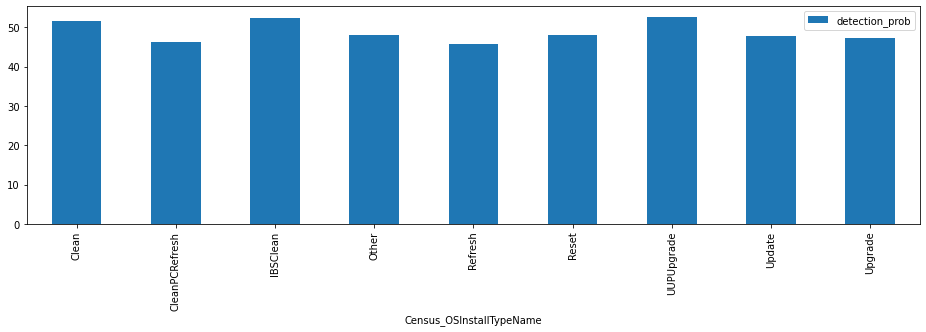

In [73]:
d1 = df.groupby('Census_OSInstallTypeName')['HasDetections'].agg(['sum','count'])
d1['detection_prob'] = d1['sum']/d1['count']*100

d1.plot.bar(y='detection_prob')

<AxesSubplot:xlabel='Census_MDC2FormFactor'>

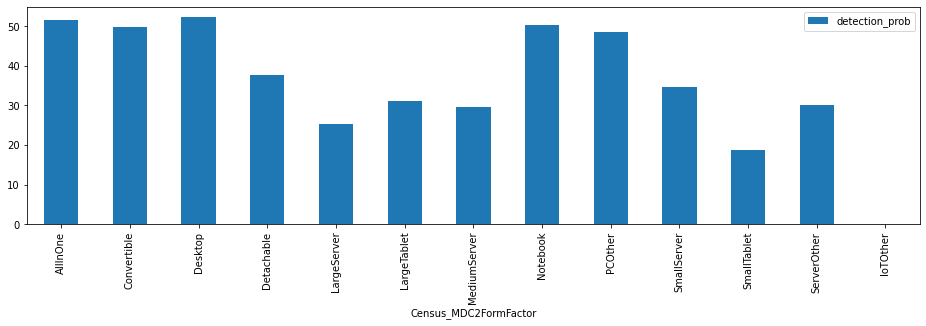

In [75]:
d1 = df.groupby('Census_MDC2FormFactor')['HasDetections'].agg(['sum','count'])
d1['detection_prob'] = d1['sum']/d1['count']*100

d1.plot.bar(y='detection_prob')

The above graphs show the probability of each type of device showing up as malware in the dataset. These kind of categorical evaluations are helpful in understanding how different types of devices could get impacted to this malware. As shown, Windows2016 shows least probability of getting affected by malware, cleanPCRefresh show minimum chances of malware detection between the various upgrade types.

## **Section 6: Baseline modelling (Q6)**

***Q6.* Now build a baseline model for this task. We will call this Model 0. You will train a logistic regression model on 80% of the training data and test it on the remaining 20% chosen at random. List the features used and print the error rate along with the AUC score of this model. What do you make of the error rate?**

In [6]:
#Logistic Regression for Baseline modelling


numerical_columns = ['Census_FirmwareManufacturerIdentifier','Census_PrimaryDiskTotalCapacity','Census_OEMNameIdentifier', 'Wdft_RegionIdentifier',
                  'Census_OSBuildRevision','LocaleEnglishNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_SystemVolumeTotalCapacity', 
                  'AVProductStatesIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'CountryIdentifier']

categorical_columns = ['Census_ActivationChannel','OsBuildLab',
                    'EngineVersion','SmartScreen','AppVersion','Census_OSVersion','AvSigVersion','Census_OSInstallTypeName']

feature_set = numerical_columns + categorical_columns

X = data[feature_set]
y = data['HasDetections']



# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [7]:

# Create copies for this model with only numerical columns
baseline_X_train = X_train[numerical_columns].copy()
baseline_X_test = X_test[numerical_columns].copy()

In [8]:
# Remove data from memory, we will use X and y for all the following questions
del data

In [9]:
# Data Cleaning


#baseline_X_train = baseline_X_train.apply(pd.to_numeric, errors='coerce')


baseline_X_train.fillna(-1, inplace=True)
baseline_X_test.fillna(-1, inplace=True)

In [10]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# instantiate the model 
log_reg = LogisticRegression()

# model fit with data
log_reg.fit(baseline_X_train,y_train)

# Predict y values based on model
y_pred=log_reg.predict(baseline_X_test)

In [11]:
# Test the prediction using Confusion matrix
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix


array([[    17, 892080],
       [     9, 892191]])

Text(0.5, 257.44, 'Predicted label')

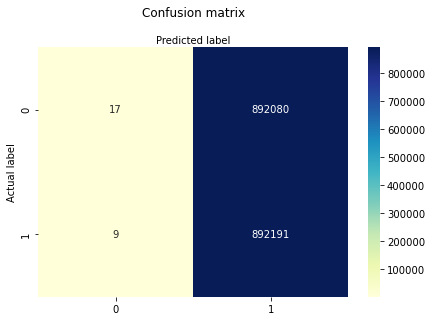

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [13]:
print("Model Accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("Model Precision = ",metrics.precision_score(y_test, y_pred))
print("Model Recall = ",metrics.recall_score(y_test, y_pred))

Model Accuracy =  0.5000333464664235
Model Precision =  0.5000311051404187
Model Recall =  0.9999899125756557


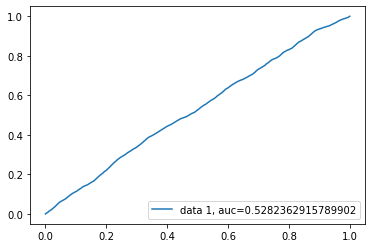

In [14]:
y_pred_probability = log_reg.predict_proba(baseline_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [15]:
print('AUC Score: {}%'.format(auc*100)) 
print('\nError rate (Mean Squared Error) {}%\n'.format(100* metrics.mean_squared_error(y_test, y_pred)))

AUC Score: 52.82362915789902%

Error rate (Mean Squared Error) 49.996665353357656%



In [16]:
import joblib
joblib.dump(log_reg, 'log_reg_baseline.sav')

['log_reg_baseline.sav']

Model accuracy is at 50% and AUC score is also ~53. This implies that the baseline model is performing the same as random guessing. It's definitely not a good model, but we can try to improve the accuracy with some data processing.


## **Section 7: Feature Cleaning and Additional models (Q7a & 7b)**

***Q7.a*
Cleaning Features: Features can be preprocessed to improve them before feeding into the model (e.g. normalize or scale the input vector, convert non-numerical value into float, or do a special treatment of missing values, etc). This can significantly improve the performance of your model. Do preprocessing for the features. Explain what you did.**

In [8]:
X_train = X_train[feature_set]
X_test = X_test[feature_set]

In [9]:
# For numerical data, fill NaN values with -1
X_train[numerical_columns] = X_train[numerical_columns].fillna(value=-1)
X_train.isnull().sum()


X_test[numerical_columns] = X_test[numerical_columns].fillna(value=-1)
X_test.isnull().sum()

Census_FirmwareManufacturerIdentifier                     0
Census_PrimaryDiskTotalCapacity                           0
Census_OEMNameIdentifier                                  0
Wdft_RegionIdentifier                                     0
Census_OSBuildRevision                                    0
LocaleEnglishNameIdentifier                               0
Census_ProcessorModelIdentifier                           0
Census_SystemVolumeTotalCapacity                          0
AVProductStatesIdentifier                                 0
Census_InternalPrimaryDiagonalDisplaySizeInInches         0
CountryIdentifier                                         0
Census_ActivationChannel                                  0
OsBuildLab                                                6
EngineVersion                                             0
SmartScreen                                          635267
AppVersion                                                0
Census_OSVersion                        

In [10]:
X_train[categorical_columns].nunique()

Census_ActivationChannel       6
OsBuildLab                   646
EngineVersion                 69
SmartScreen                   20
AppVersion                   108
Census_OSVersion             451
AvSigVersion                8474
Census_OSInstallTypeName       9
dtype: int64

For simplicity of model creation and feature set cleaning, we will only use 3 categorical columns ['Census_ActivationChannel', 'SmartScreen', 'Census_OSInstallTypeName'].

We then encode each of these columns with a numerical label so that it becomes easier for our model to process them.

In [11]:
select_categorical_columns = ['Census_ActivationChannel', 'SmartScreen', 'Census_OSInstallTypeName']

print(X_train.Census_ActivationChannel.value_counts(), 
      X_train.SmartScreen.value_counts(),
      X_train.Census_OSInstallTypeName.value_counts())

Retail            3781248
OEM:DM            2731351
Volume:GVLK        361133
OEM:NONSLP         254130
Volume:MAK           6466
Retail:TB:Eval       2858
Name: Census_ActivationChannel, dtype: int64 RequireAdmin    3452485
ExistsNotSet     837414
Off              149316
Warn             108179
Prompt            27543
Block             18101
off                1087
On                  594
&#x02;              342
&#x01;              253
on                  109
requireadmin          8
OFF                   2
Promt                 2
0                     2
Enabled               1
prompt                1
warn                  1
00000000              1
&#x03;                1
requireAdmin          0
Name: SmartScreen, dtype: int64 UUPUpgrade        2086177
IBSClean          1321383
Update            1274666
Upgrade           1001520
Other              671909
Reset              519243
Refresh            164367
Clean               55282
CleanPCRefresh      42639
Name: Census_OSInstallTypeNam

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in select_categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])

In [13]:
X_train = X_train[numerical_columns + select_categorical_columns]
X_test = X_test[numerical_columns + select_categorical_columns]

In [14]:
# Apply minmaxScalin to all column in train and test set
# This is done so that all features are now scaled 0 - 1 and thus can be directly used in our model
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

***Q7.b.i* Final Model Creation: Create two models.
Model 1 should use the cleaned features (All of the features do not have to be preprocessed) and logistic regression for training.**


#### Model 1: Logistic Regression with pre-processed data

In [151]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# instantiate the model 
log_reg = LogisticRegression()

# model fit with data
log_reg.fit(X_train,y_train)

# Predict y values based on model
y_pred=log_reg.predict(X_test)

In [152]:
# Test the prediction using Confusion matrix
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix


array([[299297, 592800],
       [210498, 681702]])

Text(0.5, 257.44, 'Predicted label')

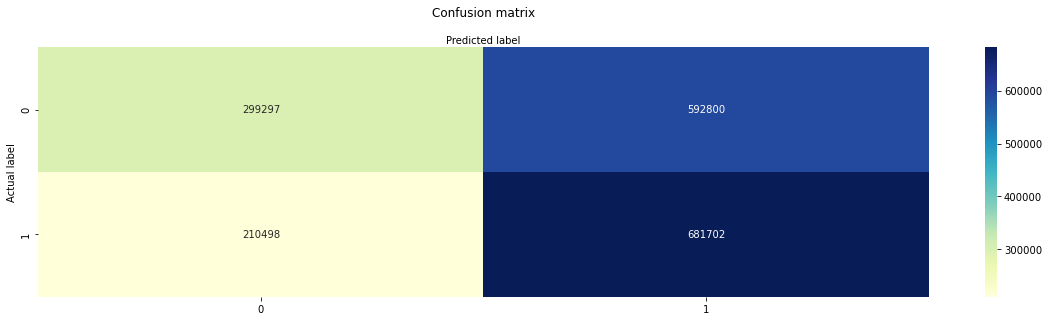

In [153]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [154]:
print("Model Accuracy = ",metrics.accuracy_score(y_test, y_pred))
print("Model Precision = ",metrics.precision_score(y_test, y_pred))
print("Model Recall = ",metrics.recall_score(y_test, y_pred))

Model Accuracy =  0.5497958019320774
Model Precision =  0.5348771520170231
Model Recall =  0.7640685944855413


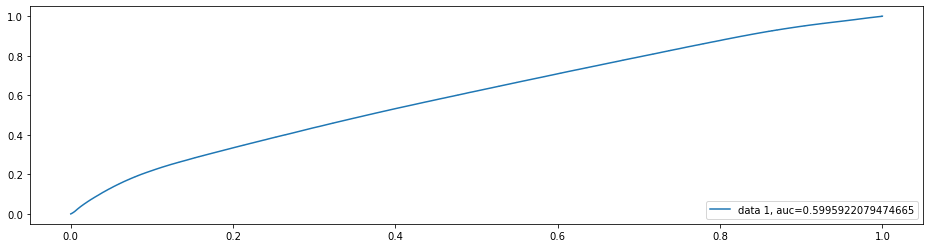

In [155]:
y_pred_probability = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [157]:
print('AUC Score: {}%'.format(auc*100)) 
print('\nError rate (Mean Squared Error) {}%\n'.format(100* metrics.mean_squared_error(y_test, y_pred)))

AUC Score: 59.95922079474665%

Error rate (Mean Squared Error) 45.020419806792255%



In [161]:
import joblib
joblib.dump(log_reg, 'log_reg_clean_data.sav')

['log_reg_clean_data.sav']

Using the same train/test split and the same Logistic Regression model, we now see that model accuracy has increased to 54% with an AUC score of ~60.

So after cleaning the feature set and doing some pre-processing, we do see an improvement in the prediction however it is still not very good.

Let's try a different model for the prediction with the same feature set and test/train split.

***Q7.b.ii.* Model 2 should use the cleaned features (All of the features do not have to be preprocessed) and an algorithm other than logistic regression (e.g. Random Forest, Nearest Neighbor, etc) for training.**


#### Random Forest Classifier with Pre-processed data

In [162]:
del data, log_reg, X, y

In [15]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=25, oob_score=True, random_state=123456, verbose=3, criterion='entropy')
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.0s remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s


building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 12.8min finished
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(criterion='entropy', n_estimators=25, oob_score=True,
                       random_state=123456, verbose=3)

In [16]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


Out-of-bag score estimate: 0.607
Mean accuracy score: 0.576


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   21.4s finished


In [24]:
print("Model Accuracy = ",metrics.accuracy_score(y_test, predicted))
print("Model Precision = ",metrics.precision_score(y_test, predicted))
print("Model Recall = ",metrics.recall_score(y_test, predicted))

Model Accuracy =  0.5756872314418507
Model Precision =  0.6009848829143445
Model Recall =  0.4505783456624075


In [18]:
# Test the prediction using Confusion matrix
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y_test, predicted)
cf_matrix

array([[625191, 266906],
       [490194, 402006]])

Text(0.5, 257.44, 'Predicted label')

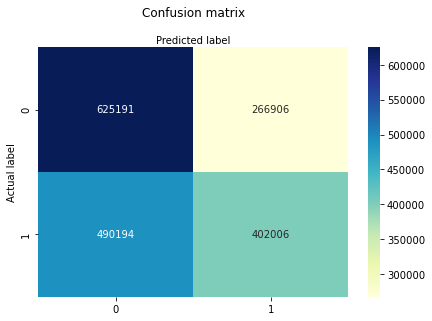

In [19]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

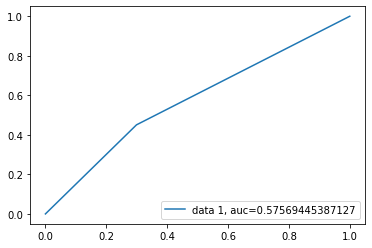

In [20]:

fpr, tpr, _ = metrics.roc_curve(y_test,  predicted)

auc = metrics.roc_auc_score(y_test, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
print('AUC Score: {}%'.format(auc*100)) 
print('\nError rate (Mean Squared Error) {}%\n'.format(100* metrics.mean_squared_error(y_test, predicted)))

AUC Score: 57.569445387127004%

Error rate (Mean Squared Error) 42.43127685581493%



Here we see model accuracy as 57% which seems to be worse than the linear regression model we used earlier. There could be multiple factors for this. One of them could be due to the number of iterations Random Forest classifier ran for. 


For simiplicity, and due to memory limitations, I was not able to run the classifier for more than 25-30 iterations. But increasing the number of iterations (estimators) on the Random forest function could potentially give better results.

In [26]:
import joblib
joblib.dump(rf, 'random_forest_clean_data.sav')

['random_forest_clean_data.sav']

### Error Rate Comparison between models


|Model Name |Description| AUC Score (in %) | Error (MSE) (in %) |
| :- | :-|:-: | :-: |
| Model 0 |Baseline Logistic Regression without Data Cleaning| 52.82% | 49.99%
| Model 1 |Logistic Regression with Data Cleaning| 59.95% | 45.02%
| Model 2 |Random Forest with Data Cleaning| 57.56% | 42.43%

The AUC score and error rate for the three models are tabulated above.

Between all the models, we find Logistic Regression performed much better on the dataset after we cleaned the data (Model 1). Model 0 performed the worst considering that it's AUC score is only slightly better than random guessing, and that is justified since we are using only the numerical columns without any pre-processing.

An interesting observation here is that of Model 2, which uses Random Forest classifiers with clean data which did not outperform Logistic Regression. Now it is difficult to say with certainty why Model 1 is performing better than Model 2, but one of the important things to consider is the data set and the features used. Random Forests is a very versatile algorithm and generally performs better than Logistic Regression when the dataset has a lot of spare features, including categorical and numerical features. So one would expect Model 2 to be better performing here. However, we also need to consider the following points about this dataset which could have affected the outcome here:

1. Logistic Regression is much faster to train and run on large dimensional dataset compared to Random Forests. Due to the huge size of the train and test sets, I decided to not spend too much time on optimizing Random Forests.

2. Random Forests tend to give better results for a specific number (usually large) of estimators. Since creating more trees for estimation would just keep using more and more memory, I restricted the number of trees to 25. With more trial and error, it would be possible to find an estimator count which outperforms Logistic Regression. But due to interest of time and resources, I decided to stick with 25.

3. During pre-processing, I converted all categorical columns into numeric categories using Label Encoding and then normalized their distribution using MinMaxScaling. So, even though the actual column values were categorical, after pre-processing all of the columns were essentially acting as numerical features. Logistic Regression, typically, performs really well with numerical columns.

## **Section 8: Screenshots (Q8)** 

***Q8.* Write the probability of detection for the test instances (test.csv) into a csv file as shown in ‘sample_submission.csv’ at Kaggle. Submit this for every model you develop to the competition website. Report the private and public score for your best submission along with the number of submissions. Include a snapshot of your best score on the website as confirmation. Be sure to provide a link to your Kaggle profile.**

### Validating results against test.csv

Pre-processing the test.csv data with the same steps as train.csv data

In [19]:
filename = 'test.csv'

use_cols = ["MachineIdentifier", "SmartScreen", "AVProductsInstalled", "AppVersion", "CountryIdentifier", "Census_OSInstallTypeName", "Wdft_IsGamer",
           "EngineVersion", "AVProductStatesIdentifier", "Census_OSVersion", "Census_TotalPhysicalRAM", "Census_ActivationChannel",
           "RtpStateBitfield", "Census_ProcessorModelIdentifier", "Census_PrimaryDiskTotalCapacity", 
            "Census_InternalPrimaryDiagonalDisplaySizeInInches", "Wdft_RegionIdentifier", "LocaleEnglishNameIdentifier",
           "AvSigVersion", "IeVerIdentifier", "IsProtected", "Census_InternalPrimaryDisplayResolutionVertical", "Census_PrimaryDiskTypeName",
            "Census_OSWUAutoUpdateOptionsName", "Census_OSEdition", "Census_GenuineStateName", "Census_ProcessorCoreCount", 
           "Census_OEMNameIdentifier", "Census_MDC2FormFactor", "Census_FirmwareManufacturerIdentifier", "OsBuildLab", "Census_OSBuildRevision", 
            "Census_OSBuildNumber", "Census_IsPenCapable", "Census_IsTouchEnabled", "Census_IsAlwaysOnAlwaysConnectedCapable", "Census_IsSecureBootEnabled", 
            "Census_SystemVolumeTotalCapacity", "Census_PrimaryDiskTotalCapacity"
           ]

skip = 0

data = pd.read_csv(filename, usecols = use_cols, dtype = dtypes, skiprows=skip)

data.set_index('MachineIdentifier', inplace=True)


numerical_columns = ['Census_FirmwareManufacturerIdentifier','Census_PrimaryDiskTotalCapacity','Census_OEMNameIdentifier', 'Wdft_RegionIdentifier',
                  'Census_OSBuildRevision','LocaleEnglishNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_SystemVolumeTotalCapacity', 
                  'AVProductStatesIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'CountryIdentifier']

select_categorical_columns = ['Census_ActivationChannel', 'SmartScreen', 'Census_OSInstallTypeName']

feature_set = numerical_columns + select_categorical_columns


In [20]:
X = data[feature_set].copy()
X.head(10)

,Census_FirmwareManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_OEMNameIdentifier,Wdft_RegionIdentifier,Census_OSBuildRevision,LocaleEnglishNameIdentifier,Census_ProcessorModelIdentifier,Census_SystemVolumeTotalCapacity,AVProductStatesIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,CountryIdentifier,Census_ActivationChannel,SmartScreen,Census_OSInstallTypeName
MachineIdentifier,,,,,,,,,,,,,,
0000010489e3af074adeac69c53e555e,807.000000,488386.000000,2688.000000,7.000000,1387,42,3064.000000,123179.000000,53447.000000,15.500000,43,OEM:DM,NaN,Reset
00000176ac758d54827acd545b6315a5,554.000000,1907729.000000,2206.000000,12.000000,611,74,3410.000000,1882352.000000,53447.000000,15.500000,68,Retail,RequireAdmin,UUPUpgrade
0000019dcefc128c2d4387c1273dae1d,556.000000,29820.000000,585.000000,11.000000,2189,-5,2096.000000,28678.000000,49480.000000,13.898438,201,OEM:DM,RequireAdmin,Other
0000055553dc51b1295785415f1a224d,628.000000,476940.000000,2668.000000,10.000000,371,-85,1985.000000,439345.000000,42160.000000,14.000000,29,OEM:DM,RequireAdmin,Upgrade
00000574cefffeca83ec8adf9285b2bf,556.000000,476940.000000,585.000000,3.000000,371,-74,3394.000000,461506.000000,53447.000000,15.500000,171,Retail,RequireAdmin,Update
000007ffedd31948f08e6c16da31f6d1,168.000000,305244.000000,1980.000000,10.000000,286,-85,3512.000000,304261.000000,53447.000000,17.000000,29,Retail,NaN,Upgrade
000008f31610018d898e5f315cdf1bd1,142.000000,953869.000000,4144.000000,10.000000,345,-85,2382.000000,936631.000000,7945.000000,15.500000,29,OEM:DM,NaN,Refresh
00000a3c447250626dbcc628c9cbc460,657.000000,305245.000000,2972.000000,9.000000,125,126,3224.000000,304352.000000,15521.000000,17.000000,101,Retail,NaN,Upgrade
00000b6bf217ec9aef0f68d5c6705897,NaN,NaN,2668.000000,NaN,134,75,NaN,NaN,53447.000000,15.500000,21,Retail,NaN,IBSClean


In [21]:

# For numerical data, fill NaN values with -1
X[numerical_columns] = X[numerical_columns].fillna(value=-1)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in select_categorical_columns:
    X[col] = le.fit_transform(X[col])

   
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X[feature_set] = scaler.fit_transform(X[feature_set])

X.head(10)

,Census_FirmwareManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_OEMNameIdentifier,Wdft_RegionIdentifier,Census_OSBuildRevision,LocaleEnglishNameIdentifier,Census_ProcessorModelIdentifier,Census_SystemVolumeTotalCapacity,AVProductStatesIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,CountryIdentifier,Census_ActivationChannel,SmartScreen,Census_OSInstallTypeName
MachineIdentifier,,,,,,,,,,,,,,
0000010489e3af074adeac69c53e555e,0.741965,0.000000,0.437592,0.500000,0.033233,0.666667,0.684610,0.001292,0.758095,0.076834,0.190045,0.000000,1.000000,0.625000
00000176ac758d54827acd545b6315a5,0.509642,0.000000,0.359154,0.812500,0.014640,0.792157,0.761894,0.019736,0.758095,0.076834,0.303167,0.400000,0.619048,0.750000
0000019dcefc128c2d4387c1273dae1d,0.511478,0.000000,0.095362,0.750000,0.052449,0.482353,0.468394,0.000301,0.701828,0.069376,0.904977,0.000000,0.619048,0.375000
0000055553dc51b1295785415f1a224d,0.577594,0.000000,0.434337,0.687500,0.008889,0.168627,0.443601,0.004607,0.598003,0.069849,0.126697,0.000000,0.619048,1.000000
00000574cefffeca83ec8adf9285b2bf,0.511478,0.000000,0.095362,0.250000,0.008889,0.211765,0.758320,0.004839,0.758095,0.076834,0.769231,0.400000,0.619048,0.875000
000007ffedd31948f08e6c16da31f6d1,0.155188,0.000000,0.322376,0.687500,0.006853,0.168627,0.784677,0.003190,0.758095,0.083818,0.126697,0.400000,1.000000,1.000000
000008f31610018d898e5f315cdf1bd1,0.131313,0.000000,0.674532,0.687500,0.008266,0.168627,0.532276,0.009821,0.112704,0.076834,0.126697,0.000000,1.000000,0.500000
00000a3c447250626dbcc628c9cbc460,0.604224,0.000000,0.483808,0.625000,0.002995,0.996078,0.720348,0.003191,0.220161,0.083818,0.452489,0.400000,1.000000,1.000000
00000b6bf217ec9aef0f68d5c6705897,0.000000,0.000000,0.434337,0.000000,0.003211,0.796078,0.000000,0.000000,0.758095,0.076834,0.090498,0.400000,1.000000,0.250000


##### Prediction using Model 0 (Baseline Model)

In [22]:
import joblib
log_reg = joblib.load('log_reg_baseline.sav')1

In [28]:

numerical_columns = ['Census_FirmwareManufacturerIdentifier','Census_PrimaryDiskTotalCapacity','Census_OEMNameIdentifier', 'Wdft_RegionIdentifier',
                  'Census_OSBuildRevision','LocaleEnglishNameIdentifier', 'Census_ProcessorModelIdentifier', 'Census_SystemVolumeTotalCapacity', 
                  'AVProductStatesIdentifier', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'CountryIdentifier']


feature_set = numerical_columns 

X = data[feature_set]


X.fillna(-1, inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
X.head(10)

,Census_FirmwareManufacturerIdentifier,Census_PrimaryDiskTotalCapacity,Census_OEMNameIdentifier,Wdft_RegionIdentifier,Census_OSBuildRevision,LocaleEnglishNameIdentifier,Census_ProcessorModelIdentifier,Census_SystemVolumeTotalCapacity,AVProductStatesIdentifier,Census_InternalPrimaryDiagonalDisplaySizeInInches,CountryIdentifier
MachineIdentifier,,,,,,,,,,,
0000010489e3af074adeac69c53e555e,807.000000,488386.000000,2688.000000,7.000000,1387,42,3064.000000,123179.000000,53447.000000,15.500000,43
00000176ac758d54827acd545b6315a5,554.000000,1907729.000000,2206.000000,12.000000,611,74,3410.000000,1882352.000000,53447.000000,15.500000,68
0000019dcefc128c2d4387c1273dae1d,556.000000,29820.000000,585.000000,11.000000,2189,-5,2096.000000,28678.000000,49480.000000,13.898438,201
0000055553dc51b1295785415f1a224d,628.000000,476940.000000,2668.000000,10.000000,371,-85,1985.000000,439345.000000,42160.000000,14.000000,29
00000574cefffeca83ec8adf9285b2bf,556.000000,476940.000000,585.000000,3.000000,371,-74,3394.000000,461506.000000,53447.000000,15.500000,171
000007ffedd31948f08e6c16da31f6d1,168.000000,305244.000000,1980.000000,10.000000,286,-85,3512.000000,304261.000000,53447.000000,17.000000,29
000008f31610018d898e5f315cdf1bd1,142.000000,953869.000000,4144.000000,10.000000,345,-85,2382.000000,936631.000000,7945.000000,15.500000,29
00000a3c447250626dbcc628c9cbc460,657.000000,305245.000000,2972.000000,9.000000,125,126,3224.000000,304352.000000,15521.000000,17.000000,101
00000b6bf217ec9aef0f68d5c6705897,-1.000000,-1.000000,2668.000000,-1.000000,134,75,-1.000000,-1.000000,53447.000000,15.500000,21


In [29]:
# Predict using Model 0
y_pred = log_reg.predict_proba(X)[:,1]
res = pd.DataFrame(y_pred)
res.index = X.index # for comparison
res.columns = ["HasDetections"]
res.to_csv("model0_op.csv", chunksize=1000000)

##### Prediction using Model 1 (Logistic Regression)

In [16]:
import joblib
log_reg = joblib.load('log_reg_clean_data.sav')

In [17]:
# Predict using Model 1
y_pred = log_reg.predict_proba(X)[:,1]
res = pd.DataFrame(y_pred)
res.index = X.index # for comparison
res.columns = ["HasDetections"]
res.to_csv("model1_op.csv", chunksize=1000000)

In [18]:
del log_reg

##### Prediction using Model 2 (Random Forests)


In [21]:
import joblib
rf = joblib.load('random_forest_clean_data.sav')

In [22]:
# Predict using Model 2
y_pred = rf.predict_proba(X)[:,1]
res = pd.DataFrame(y_pred)
res.index = X.index # for comparison
res.columns = ["HasDetections"]
res.to_csv("model2_op.csv", chunksize=1000000)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.7min finished


Public Score: 0.60060 ( Random Forests )

Private Score: 0.55837 ( Random Forests )

Kaggle profile link: https://www.kaggle.com/sanketgoutam

Screenshot(s):


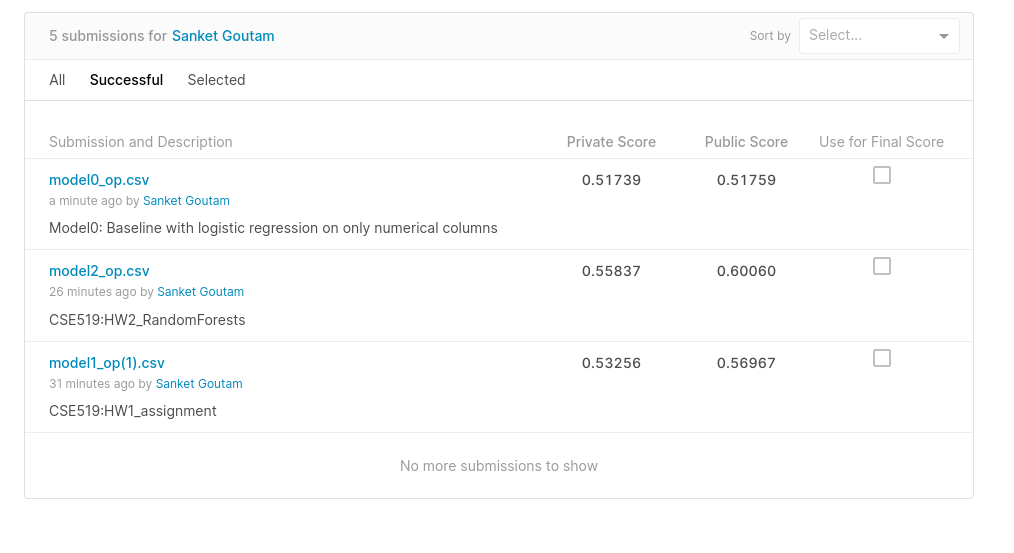

In [31]:
from IPython.display import Image
Image(filename='screenshot.png')